In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [9]:
accuracy_results = {}


In [11]:
def train_model(regularizer, title):

    model = Sequential([
        Dense(16, activation='relu',
              kernel_regularizer=regularizer,
              input_shape=(X_train.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Initial Weights
    initial_weights = model.layers[0].get_weights()[0]
    print(f"\n{title}")
    print("Initial weights (first 5 values):")
    print(initial_weights.flatten()[:5])

    history = model.fit(
        X_train,
        y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Updated Weights
    updated_weights = model.layers[0].get_weights()[0]
    print("Updated weights (first 5 values):")
    print(updated_weights.flatten()[:5])

    # -------------------------------
    # Store Accuracies
    # -------------------------------
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    accuracy_results[title] = (train_acc, val_acc, test_acc)

    # ----------------------------------------
    # LOSS CURVE
    # ----------------------------------------
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve - {title}")
    plt.legend()
    plt.show()

    # ----------------------------------------
    # ACCURACY CURVE
    # ----------------------------------------
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Curve - {title}")
    plt.legend()
    plt.show()

    # ----------------------------------------
    # ERROR CURVE
    # ----------------------------------------
    train_error = 1 - np.array(history.history['accuracy'])
    val_error = 1 - np.array(history.history['val_accuracy'])

    plt.figure()
    plt.plot(train_error, label='Training Error')
    plt.plot(val_error, label='Validation Error')
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title(f"Error Curve - {title}")
    plt.legend()
    plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



No Regularization
Initial weights (first 5 values):
[ 0.04424411 -0.29409322  0.35038182  0.18603483  0.02229536]
Updated weights (first 5 values):
[ 0.1202024  -0.22725564  0.23539862  0.26010773 -0.10009312]


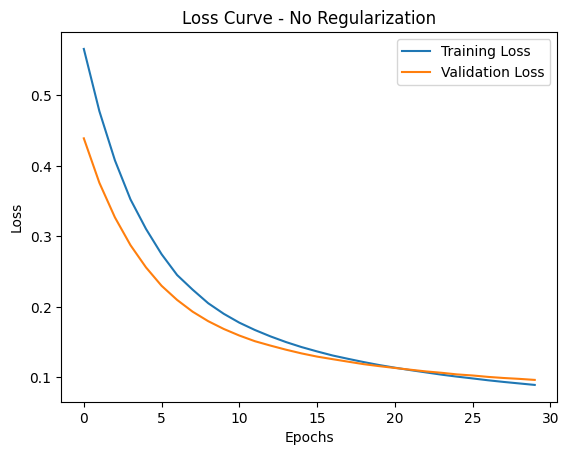

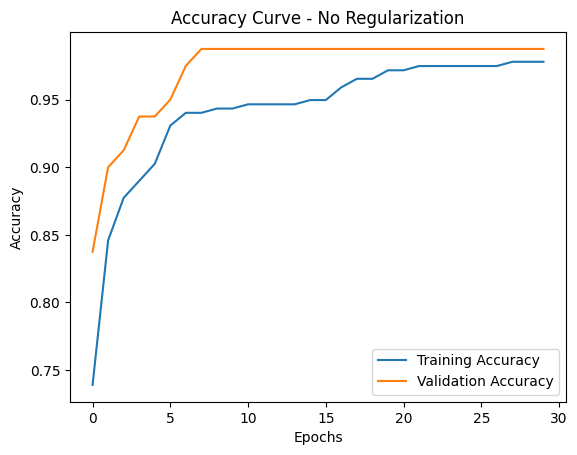

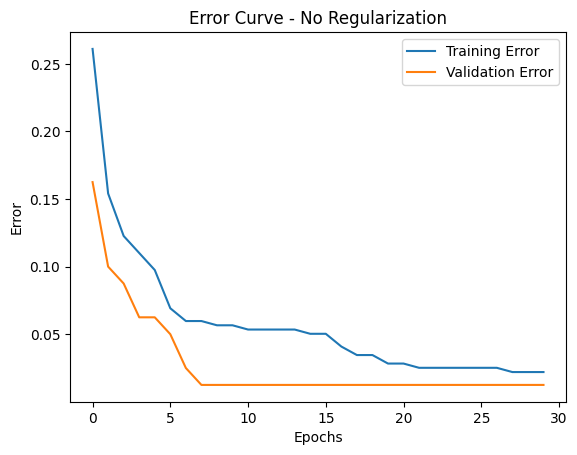


L1 Regularization
Initial weights (first 5 values):
[-0.01312241 -0.28446424  0.33450738  0.3393831  -0.17404552]
Updated weights (first 5 values):
[ 1.6879741e-04 -1.3923307e-01  8.9617118e-02  1.7675549e-01
 -2.9754965e-02]


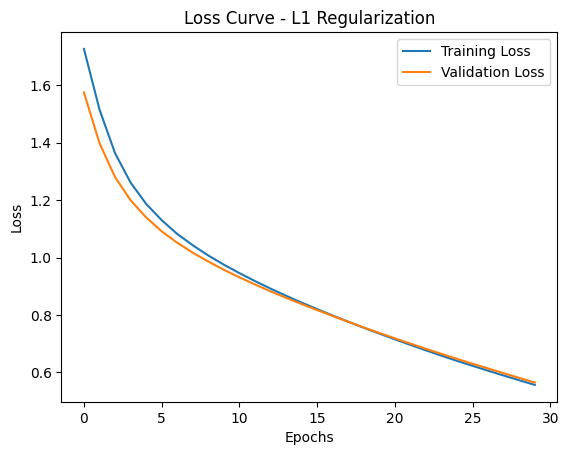

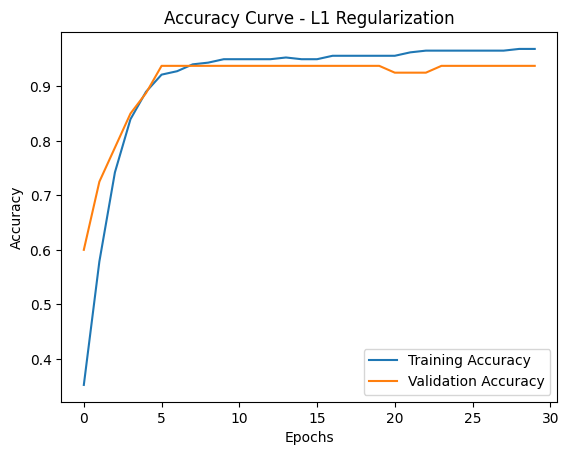

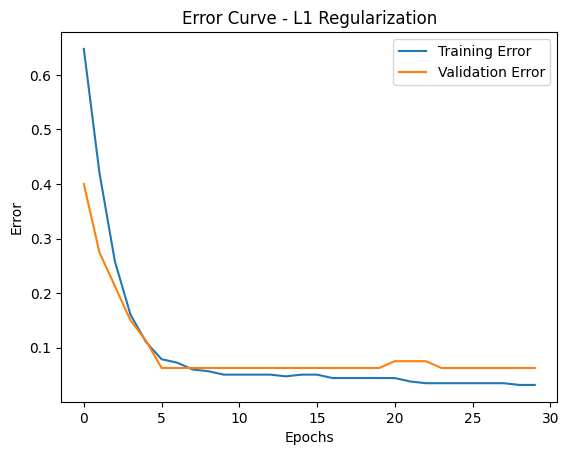


L2 Regularization
Initial weights (first 5 values):
[ 0.23399505  0.0688329  -0.27630287  0.02388471 -0.21929519]
Updated weights (first 5 values):
[ 0.08178379  0.1657417  -0.22740284 -0.05706582 -0.22628106]


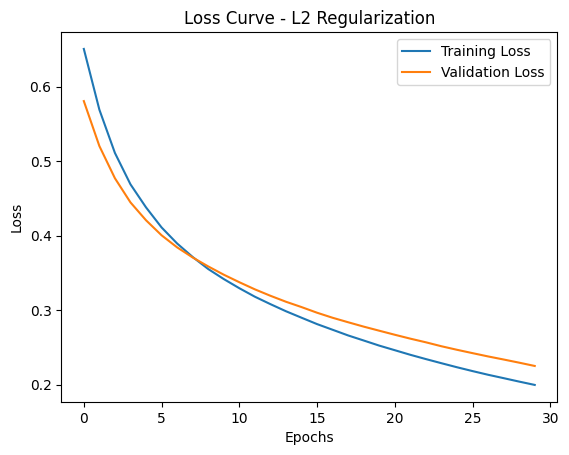

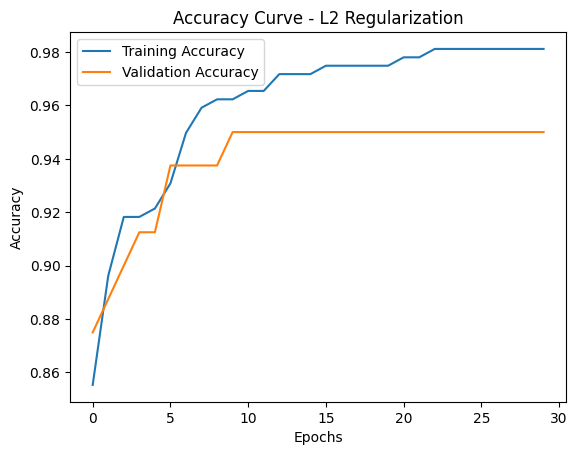

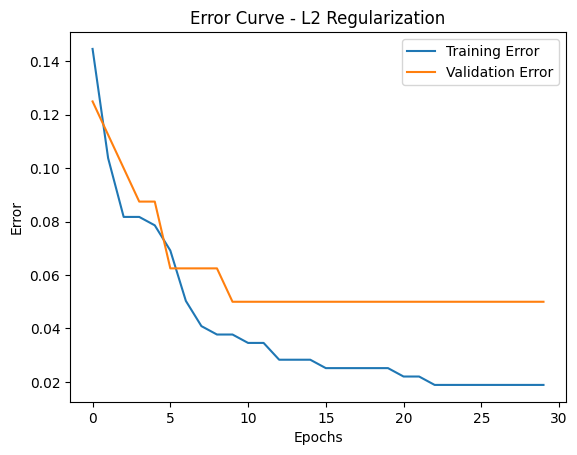


Elastic Net Regularization
Initial weights (first 5 values):
[ 0.24126574 -0.00645429 -0.04970008 -0.09325507 -0.02271545]
Updated weights (first 5 values):
[ 2.2963089e-01  1.0748871e-04  6.0326899e-03 -1.4967144e-01
  3.6184754e-02]


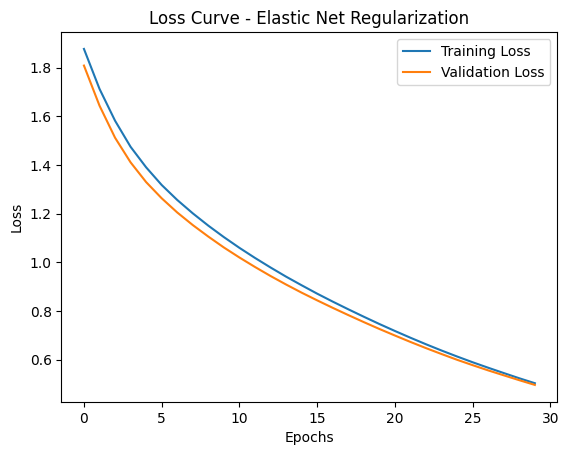

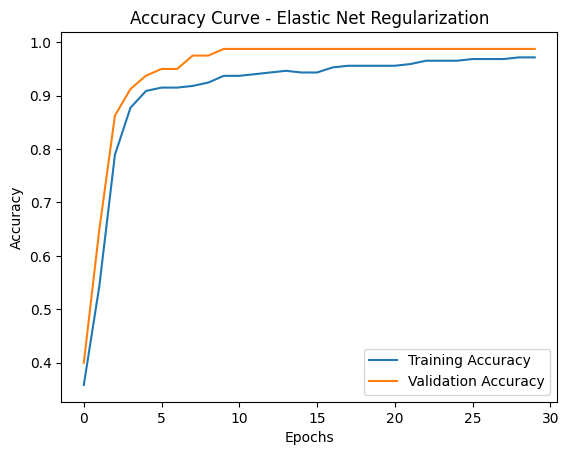

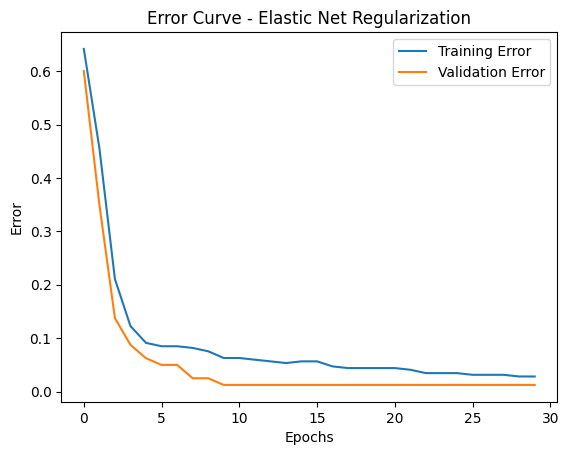

In [12]:
train_model(None, "No Regularization")
train_model(l1(0.01), "L1 Regularization")
train_model(l2(0.01), "L2 Regularization")
train_model(l1_l2(l1=0.01, l2=0.01), "Elastic Net Regularization")

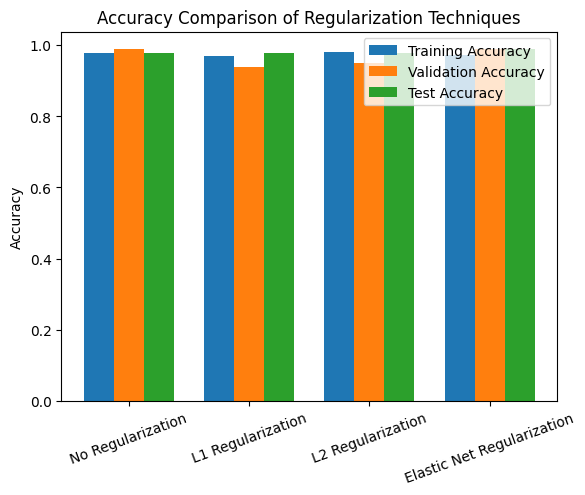

In [13]:
labels = list(accuracy_results.keys())
train_acc = [accuracy_results[m][0] for m in labels]
val_acc = [accuracy_results[m][1] for m in labels]
test_acc = [accuracy_results[m][2] for m in labels]

x = np.arange(len(labels))
width = 0.25

plt.figure()
plt.bar(x - width, train_acc, width, label='Training Accuracy')
plt.bar(x, val_acc, width, label='Validation Accuracy')
plt.bar(x + width, test_acc, width, label='Test Accuracy')

plt.xticks(x, labels, rotation=20)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Regularization Techniques")
plt.legend()
plt.show()

In [14]:
for model, acc in accuracy_results.items():
    print(f"\n{model}")
    print(f"Training Accuracy   : {acc[0]:.4f}")
    print(f"Validation Accuracy : {acc[1]:.4f}")
    print(f"Test Accuracy       : {acc[2]:.4f}")


No Regularization
Training Accuracy   : 0.9780
Validation Accuracy : 0.9875
Test Accuracy       : 0.9766

L1 Regularization
Training Accuracy   : 0.9686
Validation Accuracy : 0.9375
Test Accuracy       : 0.9766

L2 Regularization
Training Accuracy   : 0.9811
Validation Accuracy : 0.9500
Test Accuracy       : 0.9766

Elastic Net Regularization
Training Accuracy   : 0.9717
Validation Accuracy : 0.9875
Test Accuracy       : 0.9883
